In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap
import math
from time import sleep


In [10]:
data=pd.read_csv('RAND_Database_of_Worldwide_Terrorism_Incidents.csv')

In [11]:
data.head()
#data.dtypes

,Date,City,Country,Perpetrator,Weapon,Injuries,Fatalities,Description
0,9-Feb-68,Buenos Aires,Argentina,Unknown,Firearms,0,0,ARGENTINA. The second floor of the U.S. embas...
1,12-Feb-68,Santo Domingo,Dominican Republic,Unknown,Explosives,0,0,DOMINICAN REPUBLIC. A homemade bomb was found...
2,13-Feb-68,Montevideo,Uruguay,Unknown,Fire or Firebomb,0,0,URUGUAY. A Molotov cocktail was thrown outsid...
3,20-Feb-68,Santiago,Chile,Unknown,Explosives,0,0,CHILE. An explosion from a single stick of dy...
4,21-Feb-68,"Washington, D.C.",United States,Unknown,Explosives,0,0,UNITED STATES. The Soviet embassy was bombed ...


In [12]:
total_attack_country = data.groupby('Country').size()

In [13]:
total_attack_country.head()
#total_attack_country.count()

Country
Afghanistan    2025
Albania          54
Algeria         319
Angola           73
Argentina       267
dtype: int64

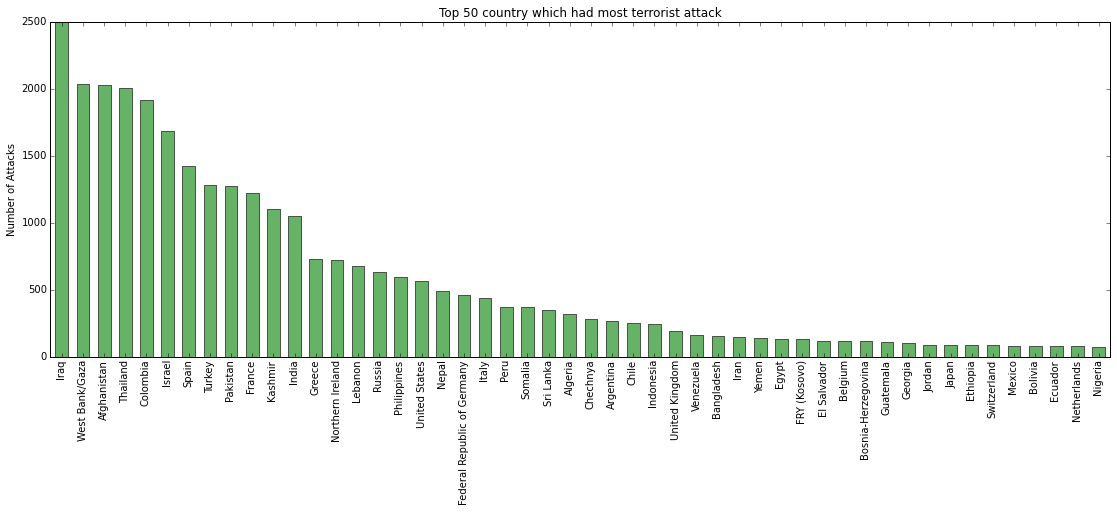

In [14]:
countdata = data['Country'].value_counts()
#countdata.plot(kind='bar', figsize=[19, 6], width=0.6, alpha=0.6, color='g', edgecolor='k', grid=False, ylim=[0, 2500])
#s = data.groupby("Country").agg(Series.nunique)
#s = data.groupby("Country").ids.agg(lambda x:len(x.unique()))
#plt.figure(figsize=(20,5))
#pd.value_counts(total_attack_country).plot(kind="bar")
top_50 = countdata.head(50)
top_50.plot(kind='bar', figsize=[19, 6], width=0.6, alpha=0.6, color='g', edgecolor='k', grid=False, ylim=[0, 2500])
plt.ylabel("Number of Attacks")
plt.title("Top 50 country which had most terrorist attack")



In [15]:
#country['D'] = country[''].map(mapping)
total_attack_country.head()

Country
Afghanistan    2025
Albania          54
Algeria         319
Angola           73
Argentina       267
dtype: int64

In [16]:
country_df = pd.DataFrame(total_attack_country)
country_df = country_df.drop('Croatians')

In [17]:
country_df.head(5)
#total_attack_country.as_matrix()

,0
Country,
Afghanistan,2025
Albania,54
Algeria,319
Angola,73
Argentina,267


Processing.........


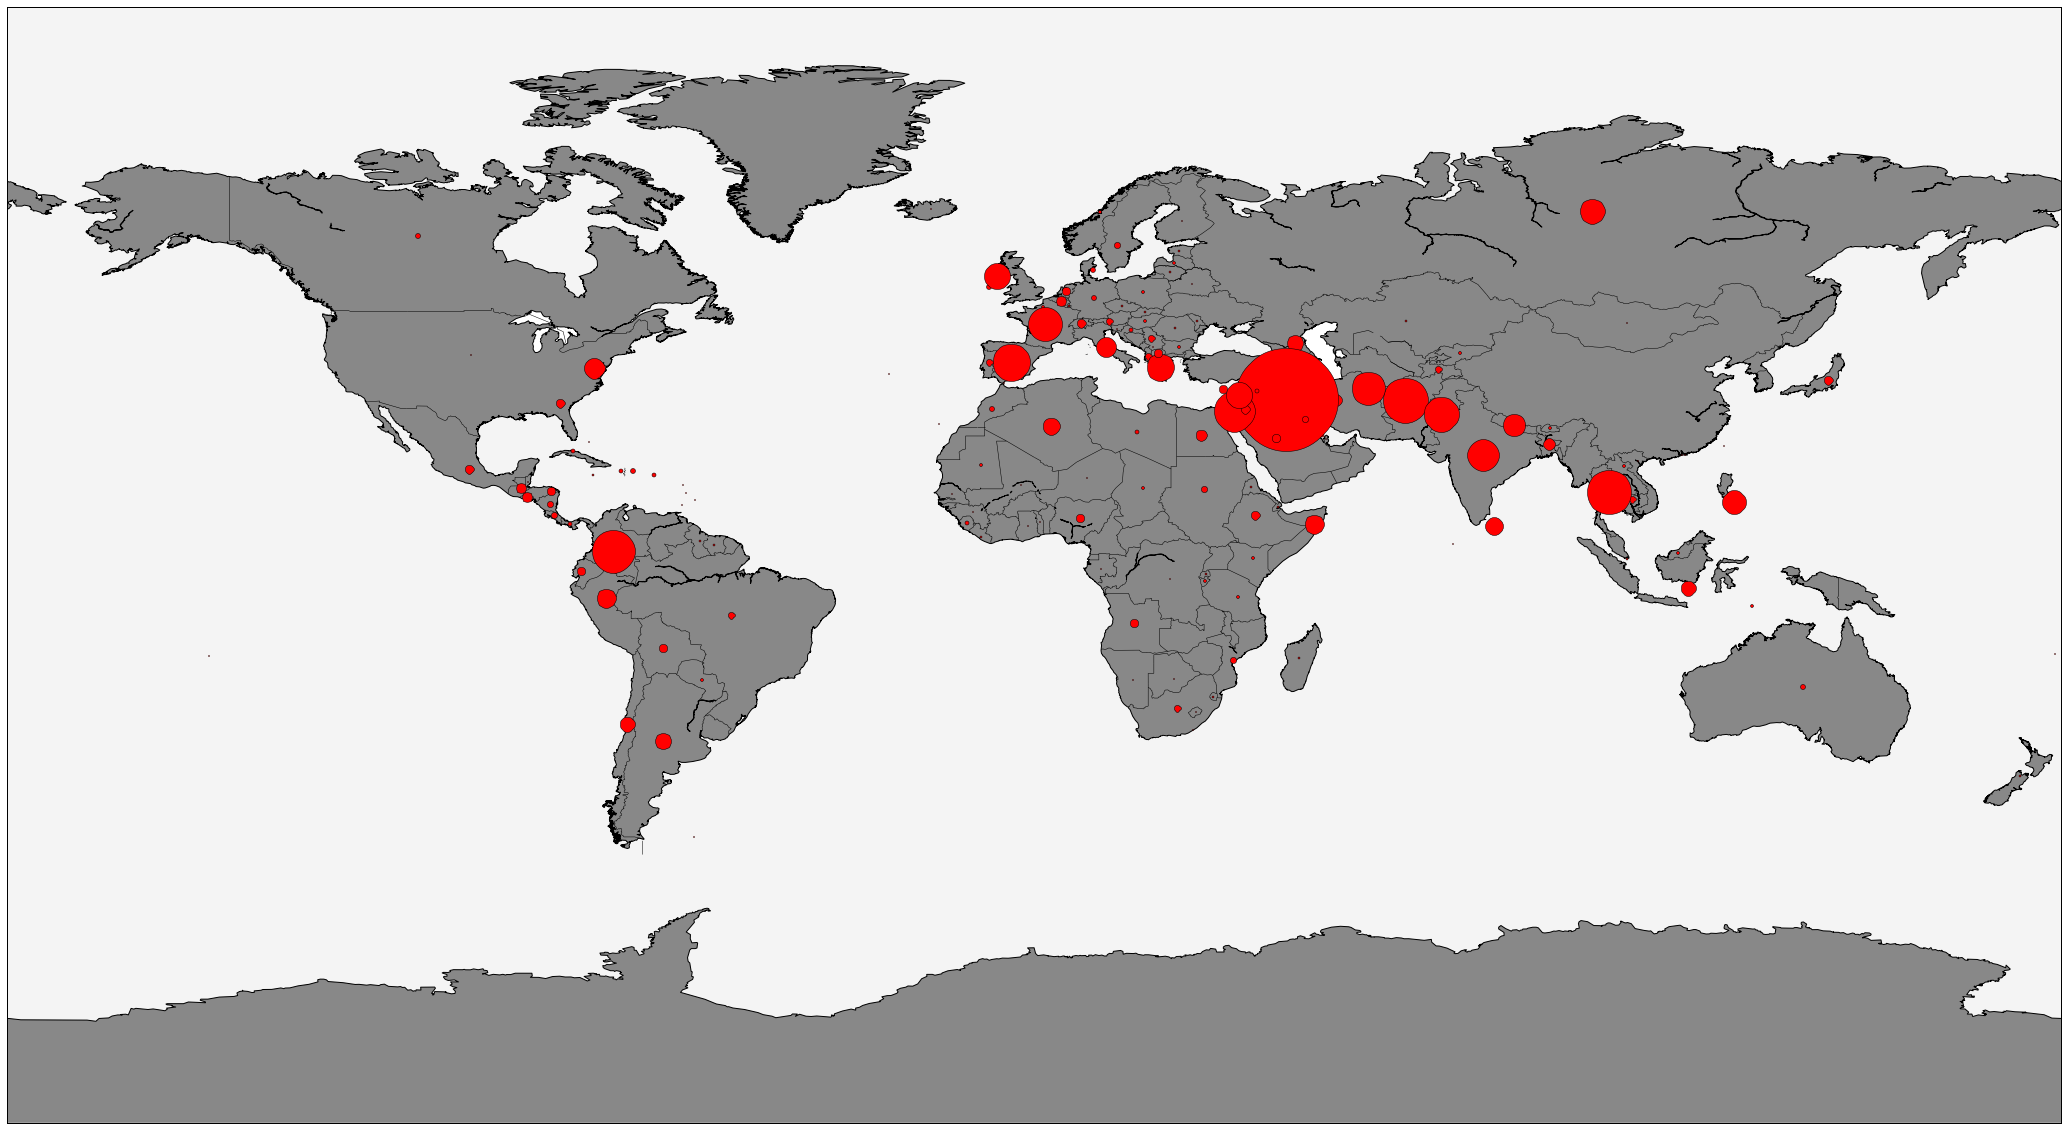

In [18]:
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)
plt.figure(figsize=(80,20))
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = '#888888')
map.drawmapboundary(fill_color='#f4f4f4')
geolocator = Nominatim()
scale = 1
print "Processing........."
try:
    for (country,count) in country_df.iterrows():
        #print country
        if all(x.isalpha() or x.isspace() for x in country):
            
                loc = geolocator.geocode(country,timeout=10)
                x, y = map(loc.longitude, loc.latitude)
                #print x ,y
                map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
                #sleep(1)
               
                
except:
    pass
plt.show()

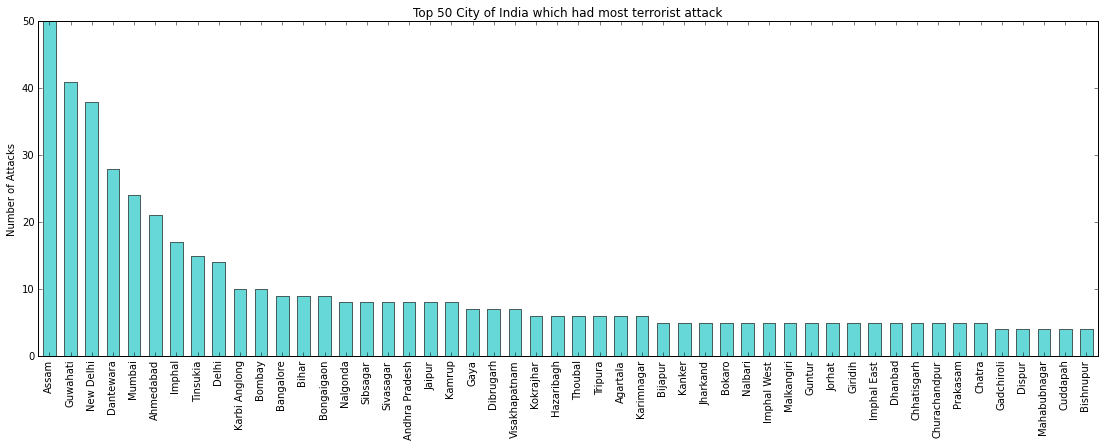

In [19]:
india_data = data[(data.iloc[:, 2] == "India")]
countdata = india_data['City'].value_counts()
top_50 = countdata.head(50)
top_50.plot(kind='bar', figsize=[19, 6], width=0.6, alpha=0.6, color='c', edgecolor='k', grid=False, ylim=[0, 50])
plt.ylabel("Number of Attacks")
plt.title("Top 50 City of India which had most terrorist attack")
